# init settings

In [29]:
datafolder = 'data'
idxDateCol = 0
idxHdrRow = 0

priceCol = 'Adj_Close'

# Functions

In [88]:
def dfItmSet(df, idx, col, itm):
    df.loc[idx,col] = itm        
    return df

def dfItmGet(df, idx, col):
    return df.loc[idx,col]

def dfColGet(df, col, asList=True):
    if asList: return df[col].tolist()
    else: return df[col]
    
def dfRowGet(df, idx, asList=True):
    if asList: return df.loc[idx,:].tolist()
    else: return df.loc[idx,:]
    

def fileList(path):
    import os
    return os.listdir(path)


def binsCal(lst):
    # calculate a suitable number of bins 
    return 100

# Implementation

In [21]:
files = fileList(datafolder)
fileTitles = [ s[:-4] for s in files ]

import pandas as pd
cub = pd.DataFrame()
cub['csvTitle'] = fileTitles
cub.index = fileTitles
cub

,csvTitle
AAPL,AAPL
AMD,AMD
LNG,LNG
QQQ,QQQ
SMLV,SMLV
SPY,SPY


In [35]:
cub['data'][1]

,Adj_Close,Adj_Volume
Date,,
1983-03-21,8.997535,510800.0
1983-03-22,8.497672,328000.0
1983-03-23,8.717612,427200.0
1983-03-24,8.780094,393200.0
1983-03-25,8.872569,210400.0
...,...,...
2018-04-10,9.980000,43036502.0
2018-04-11,9.820000,29169324.0
2018-04-12,10.080000,47784419.0


In [36]:
cub

,csvTitle,data
AAPL,AAPL,Open High Low Clos...
AMD,AMD,Adj_Close Adj_Volume Date ...
LNG,LNG,Adj_Close Adj_Volume Date ...
QQQ,QQQ,Adj_Close Adj_Volume Date ...
SMLV,SMLV,Adj_Close Adj_Volume Date ...
SPY,SPY,Adj_Close Adj_Volume Date ...


In [69]:
cub['data'][0]

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2011-10-04,374.570,381.8000,354.2400,372.50,44059900.0,0.0,1.0,47.964530,48.890347,45.361228,47.699462,308419300.0
2011-10-05,367.860,379.8200,360.3000,378.25,28088200.0,0.0,1.0,47.105299,48.636804,46.137224,48.435762,196617400.0
2011-10-06,373.330,384.7800,371.8045,377.37,29020800.0,0.0,1.0,47.805745,49.271943,47.610401,48.323076,203145600.0
2011-10-07,375.780,377.7400,368.4890,369.80,19123500.0,0.0,1.0,48.119473,48.370455,47.185844,47.353721,133864500.0
2011-10-10,379.090,388.8100,378.2100,388.81,15804100.0,0.0,1.0,48.543326,49.787994,48.430640,49.787994,110628700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-26,172.000,172.0000,170.0600,171.51,39143011.0,0.0,1.0,172.000000,172.000000,170.060000,171.510000,39143011.0
2018-01-29,170.160,170.1600,167.0700,167.96,50640406.0,0.0,1.0,170.160000,170.160000,167.070000,167.960000,50640406.0
2018-01-30,165.525,167.3700,164.7000,166.97,46048185.0,0.0,1.0,165.525000,167.370000,164.700000,166.970000,46048185.0


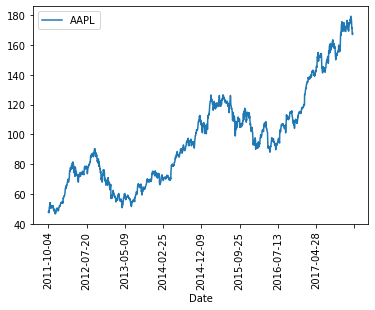

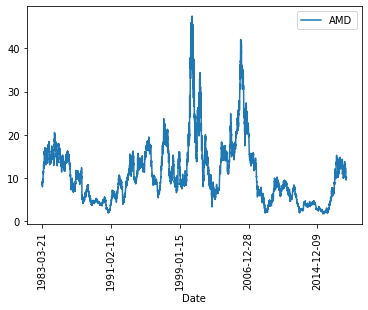

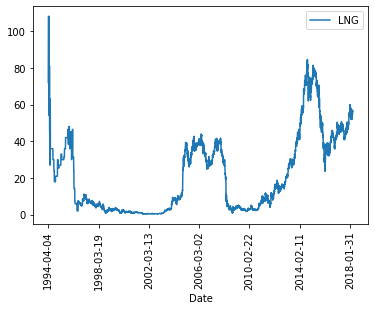

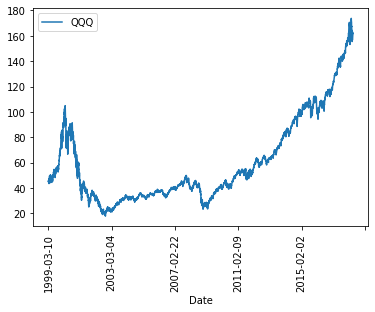

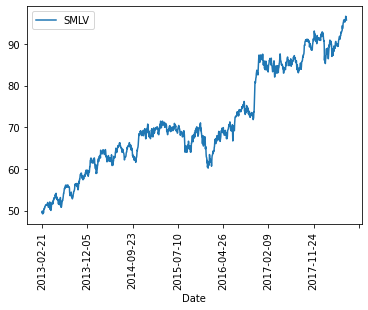

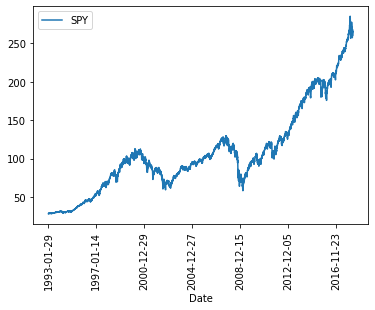

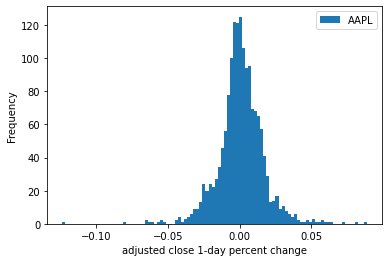

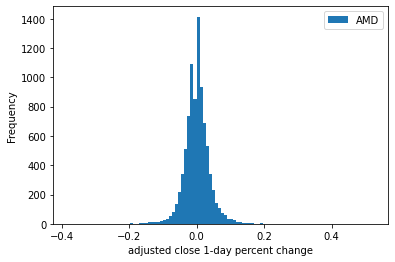

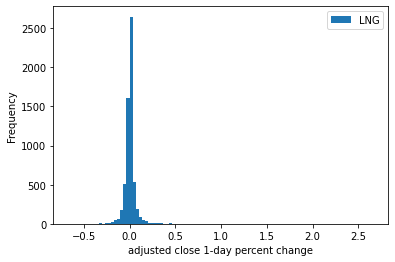

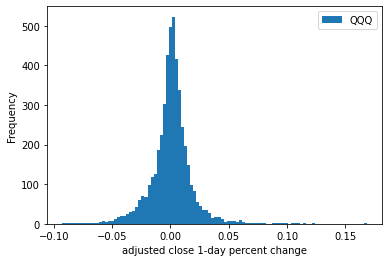

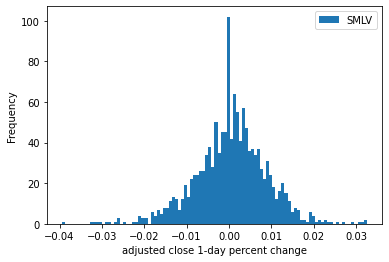

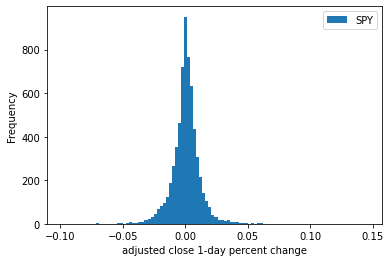

In [89]:
stocks = fileTitles

lng_df = pd.read_csv('data\lng.csv', index_col=0, header=0)
spy_df = pd.read_csv('data\spy.csv', index_col=0, header=0)
smlv_df = pd.read_csv('data\smlv.csv', index_col=0, header=0)

tmplist = []
for itm in cub.index:
    tmpdf = pd.read_csv('{}\{}'.format(datafolder,itm+'.csv'), 
                        index_col=idxDateCol, header=idxHdrRow)
    tmplist.append(tmpdf)
#     print(itm,'::::::::\n',tmpdf.head())  # examine the DataFrames
#     print('')
cub['data'] = tmplist


# Plot the  columns for SPY and LNG
import matplotlib.pyplot as plt
for i,itm in enumerate(cub['data']):
    itm[priceCol].plot(label=cub.index[i], legend=True) #, rot='vertical')
    plt.xticks(rotation=90)
    plt.show()  # show the plot
plt.clf()  # clear the plot space

# Histogram of the daily price change percent of Adj_Close for LNG
for i in range(len(cub)):
    tmp = cub['data'][i][priceCol].pct_change(1)
    tmp.plot.hist(label=cub.index[i], bins=binsCal(tmp.to_list()),legend=True)
    plt.xlabel('adjusted close 1-day percent change')
    plt.show()


